#### Задание: 
    
1. Загрузить файл data_breast.csv. В данном файле собрана расчетная информация с обработанных изображений биоптата молочных желез женщин. Задача заключается в предсказании переменной “Diagnosis” - является ли содержимое биоптата доброкачественным (значение “B” – benign) либо злокачественным (значение “M” –malicious). Описание данных доступно на сайте

2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).

3. Выбрать стратегию для работы с пропущенными значениями.

4. Рассчитать и визуализировать корреляционную матрицу для переменных.

5. Визуализировать взаимосвязи между переменными (scatter plots, гистограммы, …).

6. С помощью статистических методов проверить взаимосвязи между переменными.

7. Выбрать стратегию Feature Selection – сокращение размерности либо генерация новых переменных. Какой из этих двух подходов даст лучший результат при классификации?

8. Рассчитать Feature Selection для выбранных переменных.

9. Решить задачу бинарной классификации и предсказать переменную ”Diagnosis ” протестировав как минимум 2 алгоритма. Использовать те алгоритмы, которые позволяют предсказать вероятность класса (proba). Рассчитать и вывести вероятность каждого класса.

10. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall

11. Загрузить результат в формате .ipynb ноутбука в репозиторий, ссылку добавить в личный кабинет

### 1. Загрузка данных

In [242]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_auc_score, roc_curve

In [243]:
data = pd.read_csv("data_breast.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 2. Рассчитаем основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).

In [244]:
# посмотрим количество колонок
len(data.columns)

33

In [245]:
# посмотрим названия колонок
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [246]:
# прочитаем описание столбцов
# со страницы https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 

2) Diagnosis (M = malignant, B = benign) 

3-32) 

Ten real-valued features are computed for each cell nucleus: 

a) radius (mean of distances from center to points on the perimeter) 

b) texture (standard deviation of gray-scale values) 

c) perimeter 

d) area 

e) smoothness (local variation in radius lengths) 

f) compactness (perimeter^2 / area - 1.0) 

g) concavity (severity of concave portions of the contour) 

h) concave points (number of concave portions of the contour) 

i) symmetry 

j) fractal dimension ("coastline approximation" - 1)

In [247]:
# вычислим среднее, мин/макс, сред. отклонение по столбцам
data.describe(percentiles=[0.25, 0.5, 0.75, 0.99])

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
99%,9.010343e+08,24.371600,30.652000,165.724000,1786.600000,0.132888,0.277192,0.351688,0.164208,0.259564,...,41.802400,208.304000,2918.160000,0.188908,0.778644,0.902380,0.269216,0.486908,0.140628,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [248]:
# считаем медиану по каждому столбцу
columns = data.columns
for column in columns:
    if (len(data[column]) // 2) != 0:
        median_x = {column: sorted(data[column])[(len(data[column])//2)+1] for column in columns}
    else:
        median_x2 = {column: sorted(data[column])[(len(data[column])//2)] for column in columns}

In [249]:
# значения медианы для каждой переменной собраны в словарь
median_x

{'id': 906290,
 'diagnosis': 'B',
 'radius_mean': 13.38,
 'texture_mean': 18.87,
 'perimeter_mean': 86.34,
 'area_mean': 551.7,
 'smoothness_mean': 0.09592,
 'compactness_mean': 0.09362000000000001,
 'concavity_mean': 0.06155,
 'concave points_mean': 0.0337,
 'symmetry_mean': 0.1793,
 'fractal_dimension_mean': 0.06155,
 'radius_se': 0.3249,
 'texture_se': 1.111,
 'perimeter_se': 2.289,
 'area_se': 24.6,
 'smoothness_se': 0.006383,
 'compactness_se': 0.02047,
 'concavity_se': 0.02595,
 'concave points_se': 0.01097,
 'symmetry_se': 0.01875,
 'fractal_dimension_se': 0.003204,
 'radius_worst': 14.97,
 'texture_worst': 25.44,
 'perimeter_worst': 97.67,
 'area_worst': 686.6,
 'smoothness_worst': 0.1314,
 'compactness_worst': 0.2141,
 'concavity_worst': 0.2282,
 'concave points_worst': 0.1001,
 'symmetry_worst': 0.2823,
 'fractal_dimension_worst': 0.08006,
 'Unnamed: 32': nan}

In [250]:
# считаем моду по каждому столбцу
data.mode()[ :1]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,8670,B,12.34,14.93,82.61,512.2,0.1007,0.1147,0.0,0.0,...,17.7,101.7,284.4,0.1216,0.1486,0.0,0.0,0.2226,0.07427,NaN


### 3. Выберем стратегию для работы с пропущенными значениями.

In [251]:
# посмотрим, какие типы данных, и есть ли пропущенные значения
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [252]:
# нам "повезло", что прорпущенных значений нет, за исключением колонки "Unnamed: 32". В ней все значения NA
# категориальные переменные только в диагнозе (diagnosis)

*Стратегия работы с пропущенными значениями:* избавимся от них

In [253]:
# избавимся от 'Unnamed: 32'
data.drop(['Unnamed: 32'], axis=1, inplace=True)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [254]:
# посмотрим на колонки: один и тот же признак затраивается. Посмотрим, что это может значить.
columns = data.columns.tolist() # создаем список колонок
col_names = set([x.split('_')[0] for x in columns]) # создаем множество названий колонок по первому слову
col_dict = {x:0 for x in list(col_names)} # содаем словарь с нулевыми значениями

# узнаем, сколько раз встречается каждый признак в общем перечне названий колонок
for column in columns:
    if column.split('_')[0] in col_names:
        col_dict[column.split('_')[0]] += 1
col_dict

{'diagnosis': 1,
 'radius': 3,
 'fractal': 3,
 'symmetry': 3,
 'compactness': 3,
 'area': 3,
 'concavity': 3,
 'perimeter': 3,
 'smoothness': 3,
 'id': 1,
 'texture': 3,
 'concave points': 3}

In [255]:
# проверим общее кол-во, не упустили ли какие-то переменные.
sum(col_dict.values()) == len(data.columns)

True

In [256]:
# значения признаков приведены в трех вариантах: 'mean', 'se', 'worst'
set([x.split('_')[-1] for x in columns])

{'diagnosis', 'id', 'mean', 'se', 'worst'}

In [257]:
# остановимся на средних значениях ('mean') для исследования
# от id пациента пока тоже избавимся, т.к. переменная на первый взгляд не несет особого смысла
print(columns)

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [258]:
# найдем все переменные с 'mean' в названии
for column in columns:
    if 'mean' in column:
        print(column)

radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean


In [259]:
a = [column for column in columns if 'mean' in column] # собираем в список все 'mean'-переменные
a.insert(0,'diagnosis') #добавляем диагноз
useful_cols = a
useful_cols # получаем список "полезных" колонок

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [260]:
# поработаем с датафреймом, который несет информацию только по 'mean'-значениям
data_mean = data[useful_cols]
data_mean.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [300]:
# Визуализируем распределения _mean-фичей
features = data[a]

In [301]:
def vs_distribution(data):
    """
    Визуализирует выбросы
    """
    
    fig = pl.figure(figsize = (18,15));

    for i, feature in enumerate(data.columns[:10]): #Встроенная в Python функция enumerate() применяется для 
        # итерируемых коллекций (строки, списки, словари и др.) и 
        #создает объект, который генерирует кортежи, состоящие из двух элементов - индекса элемента и самого элемента
        ax = fig.add_subplot(5, 5, i+1)
        ax.hist(data[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s'"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        #ax.set_ylim((0, 2000))
        #ax.set_yticks([0, 500, 1000, 1500, 2000])
        #ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])

        fig.suptitle("Distributions Features", \
            fontsize = 16, y = 1.03)

    fig.tight_layout()
    fig.show()

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


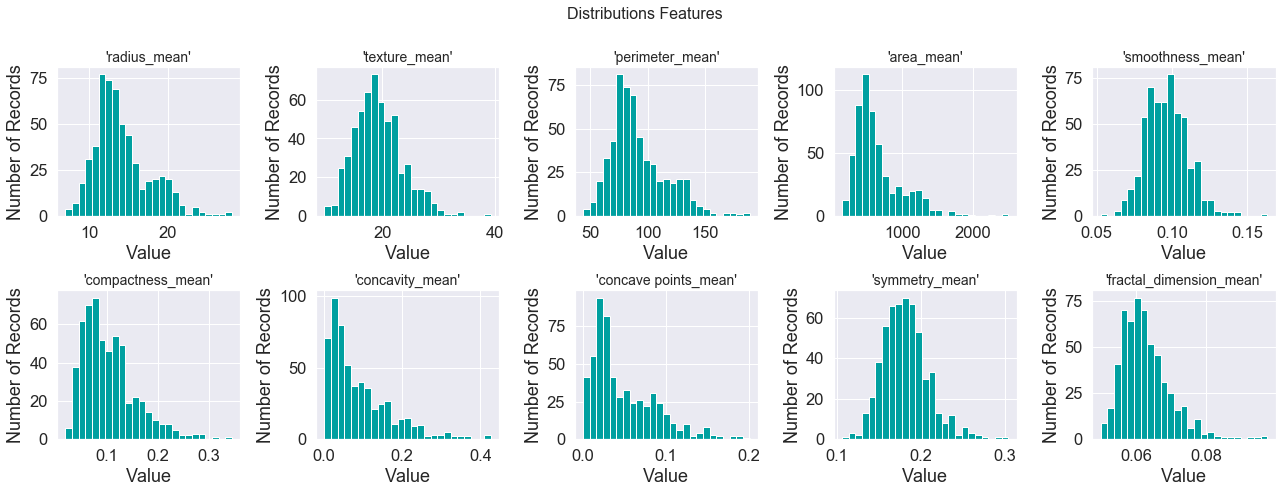

In [302]:
import matplotlib.pyplot as pl
vs_distribution(features)

#### 3.1. Выберем стратегию для работы с категориальными переменными

In [264]:
# категориальные переменные только в поле diagnosis                  
# присовим всем диагнозам 'M' значения единиц, диагнозу 'B' - нули
data['diagnosis'] = [ 1 if each == "M" else 0 for each in data['diagnosis']]
# проверим, как изменился тип данных и количество ненулевых значений в колонке 'diagnosis'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-

### 4. Рассчитаем и визуализируем корреляционную матрицу для переменных.

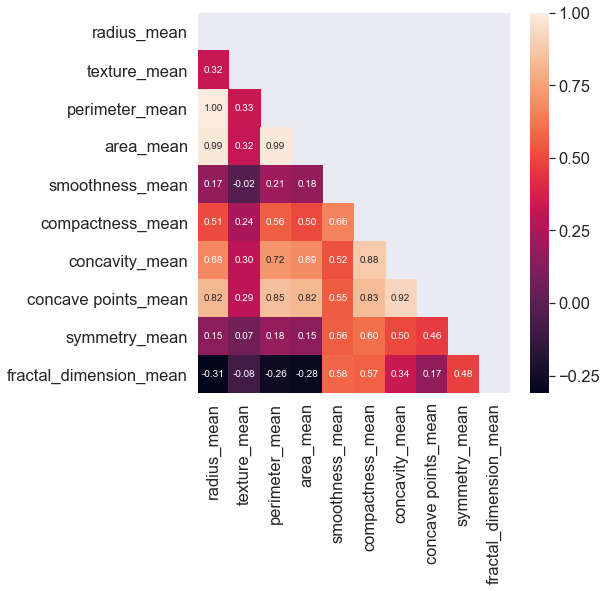

In [265]:
# построим корреляционную матрицу
corrmat = data_mean.corr()

plt.figure(figsize=(7, 7))

mask = np.triu(np.ones((len(corrmat), len(corrmat))), k=0)

sns.heatmap(corrmat, annot = True, mask = mask,
            xticklabels=corrmat.columns.values,
            yticklabels=corrmat.columns.values,
           fmt = ".2f"
           )
plt.show()

### 5. Визуализиуем взаимосвязи между переменными (scatter plots, гистограммы, …).

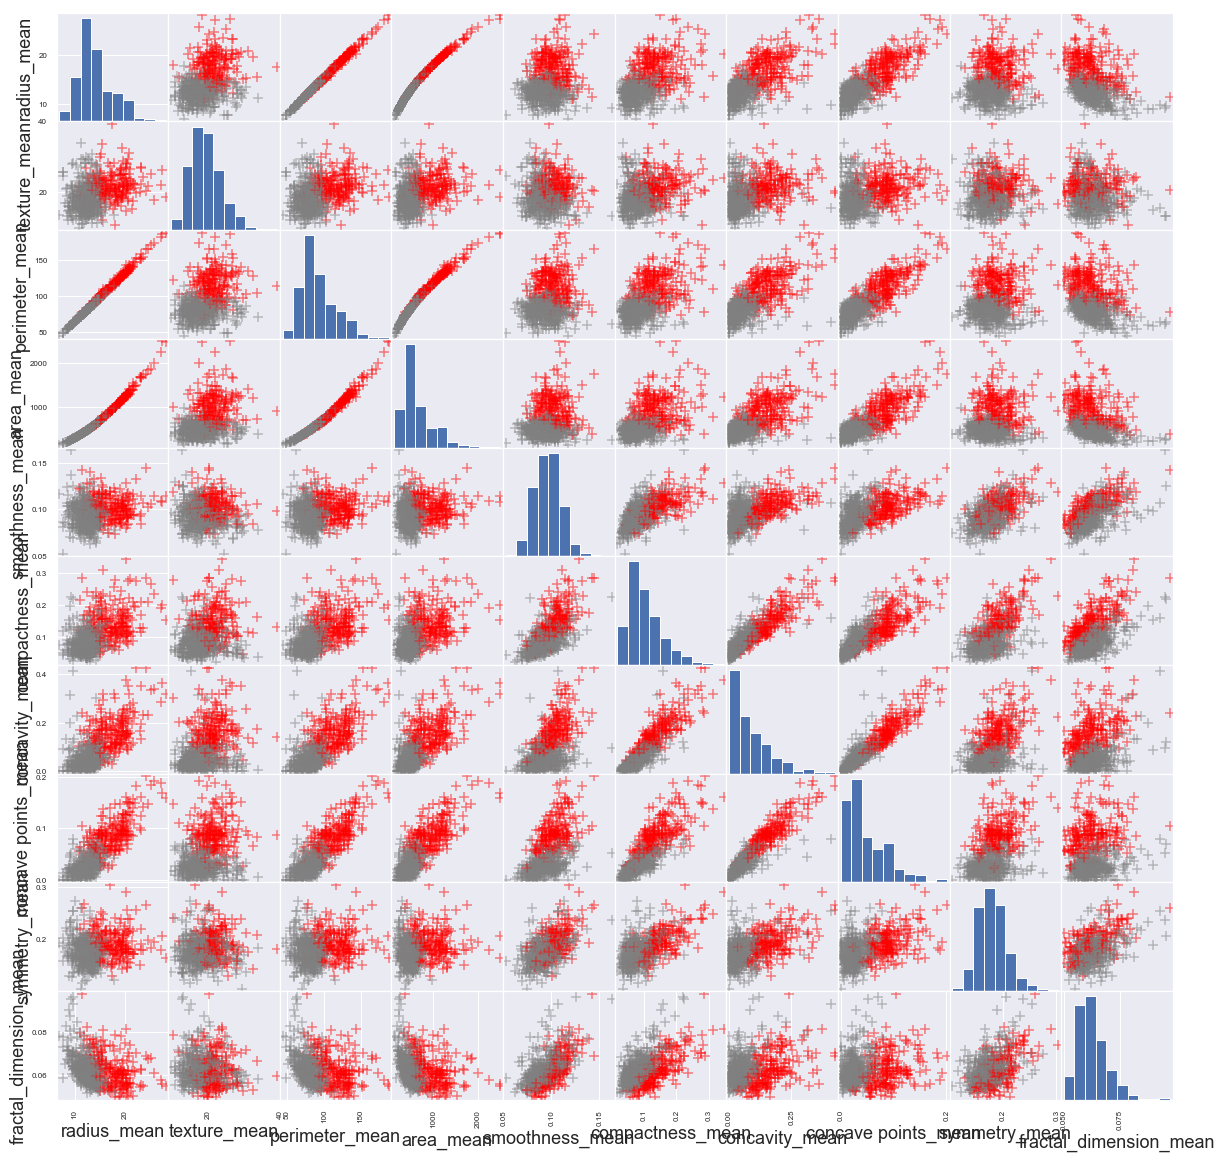

In [266]:
# визуализируем корреляции всех числовых переменных
color_list = ['red' if i=='M' else 'grey' for i in data_mean.loc[:,'diagnosis']]
pd.plotting.scatter_matrix(data_mean.loc[:, data_mean.columns != 'diagnosis'],
                           c=color_list,
                           figsize= [20,20],
                           diagonal='hist',
                           alpha=0.5,
                           s = 100,
                           marker = '+',
                           edgecolor= "black")
                                        
plt.show()
# почти по каждому груфику видно, что "красные значения" (злокачественные) превышают "синие" (доброкачественные)
# раковые клеки в среднем крупнее здоровых
# предположение: по радиусу можно с большо уверенностью сказать, есть рак или нет

0    357
1    212
Name: diagnosis, dtype: int64

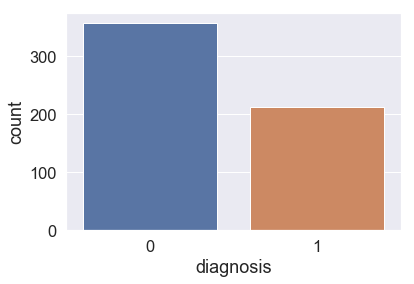

In [267]:
# посмотрим на соотношение доброкачественных ('Benign') и злокачественных ('Malignant') случаев в наших данных
sns.countplot(x="diagnosis", data=data)
data.loc[:,'diagnosis'].value_counts()

### 6.С помощью статистических методов проверим взаимосвязи между переменными

Посмотрим на корреляции переменных

In [268]:
data_mean.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


Используем T-tests

Освежим знания о т-тестах из хорошей статьи: 
https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f
    
**Types of t-tests?**

There are three main types of t-test:
    
1. An Independent Samples t-test compares the means for two groups.

2. A Paired sample t-test compares means from the same group at different times (say, one year apart).

3. A One sample t-test tests the mean of a single group against a known mean.

В scipy соответственно это будут тесты:
    
1. scipy.stats.ttest_ind

2. stats.ttest_rel (?)

3. stats.ttest_1samp

Для использования Т-теста scipy.stats.ttest_ind нужно разбить генеральную совокупность на выборки

In [269]:
# Разобъем данные на train в размере 80% и test в размере 20%
x = data_mean.drop(['diagnosis'], axis=1, inplace=False)
y = data_mean.diagnosis
y = pd.Series([ 1 if each == "M" else 0 for each in y])


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [270]:
# проверим форму получившихся датафреймов
print("x_train :", x_train.shape)
print("x_test :", x_test.shape)
print("y_train :", y_train.shape)
print("y_test :", y_test.shape)

x_train : (455, 10)
x_test : (114, 10)
y_train : (455,)
y_test : (114,)


In [271]:
# импортируем модуль stats
from scipy import stats

##### а) Проверка гипотез #1

**Нулевая гипотеза:** средние значения показателя 'radius_mean' в выборке x_train и x_test одинаковы
    
**Альтернативная гипотеза:** средние значения показателя 'radius_mean' в выборке x_train и x_test разные

In [272]:
stats.ttest_ind(x_train['radius_mean'], x_test['radius_mean'])

Ttest_indResult(statistic=-0.1304711499523461, pvalue=0.8962399532499843)

Гипотезу выше можем принять. pvalue=0.89 говорит о том, что в 89% процентах случаев будем наблюдать очень близкие средние значения 'radius_mean'.

Это ожидаемо.

##### б) Проверка гипотез #2

**Нулевая гипотеза:** средний радиус клеток в добро- и злокачественных опухолях одинаковый
    
**Альтернативная гипотеза:** средний радиус клеток в добро- и злокачественных опухолях разнятся
    
Доброкачественные -'Benign', злокачественные - 'Malignant'

Проверяем по всему набору данных, т.к. здесь разбивать ничего не нужно

In [273]:
benign_diagnosis = data[data['diagnosis'] == 0]['radius_mean']
malignant_diagnosis = data[data['diagnosis'] == 1]['radius_mean']

stats.ttest_ind(benign_diagnosis, malignant_diagnosis) 

Ttest_indResult(statistic=-25.435821610057054, pvalue=8.465940572262422e-96)

Нулевую гипотезу выше принять не можем

##### в) Проверка гипотез #3

**Нулевая гипотеза:** средний радиус клеток равен 14
    
**Альтернативная гипотеза:** средний радиус клеток не равен 14
    
Также здесь проверяем по всему набору данных

In [274]:
stats.ttest_1samp(data['radius_mean'], 14) 

Ttest_1sampResult(statistic=0.8616173566232037, pvalue=0.3892617071079777)

Нулевую гипотезу выше принимаем.

### 7. Выбрать стратегию Feature Selection – сокращение размерности либо генерация новых переменных. 

#### Dimensionality reduction

Трансформирует $p$ фич в $M$ линейных комбинаций этих фич, так, что $M < p$. Новые фичи ($Z_i$) используются для построения модели. Основная идея при трансформации - объяснить новыми фичами как можно больший процент вариативности (variance) исходных данных, при этом уменьшив размерность пространства.

Применение PCA

In [275]:
# Перед применением PCA сделаем нормализацию данных.
# Чтобы различные размерности и выбросы не сильно влияли на выводы
# Формула : (x- min(x)) / (max(x) - min(x))
a = [column for column in columns if 'mean' in column] # список колонок со словом 'mean'
data_normed = (data - np.min(data)) / (np.max(data) - np.min(data)).values
data_normed[a].head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816


In [276]:
# применяем PCA

Text(0,0.5,'explained_variance_ratio_')

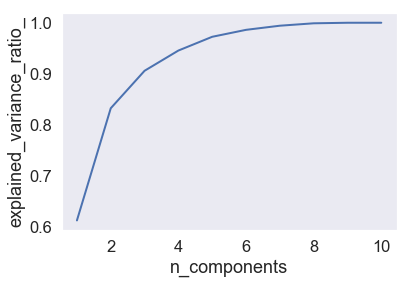

In [277]:
from sklearn.decomposition import PCA
pca = PCA().fit(data_normed[a])

cum_evr = np.cumsum(pca.explained_variance_ratio_)
xs = np.arange(cum_evr.size) + 1
plt.plot(xs, cum_evr, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

### 8. Рассчитать Feature Selection для выбранных переменных

In [278]:
# 3 компоненты объясняют 90% дисперсии
pca = PCA(n_components=data_normed[a].shape[1]).fit(data_normed[a])
for i in range(1, data_normed[a].shape[1] + 1):
    print("n-components=%s, explained variance %.3f" % (i, sum(pca.explained_variance_ratio_[:i])))

n-components=1, explained variance 0.613
n-components=2, explained variance 0.832
n-components=3, explained variance 0.906
n-components=4, explained variance 0.946
n-components=5, explained variance 0.972
n-components=6, explained variance 0.986
n-components=7, explained variance 0.994
n-components=8, explained variance 0.999
n-components=9, explained variance 1.000
n-components=10, explained variance 1.000


In [279]:
# найдем названия наиболее влиятельных компонент

In [280]:
np.set_printoptions(suppress=True)
pca.explained_variance_ratio_ * 100

array([61.25831297, 21.98248399,  7.3460217 ,  3.96486352,  2.69578783,
        1.3618532 ,  0.8090561 ,  0.4723663 ,  0.10615544,  0.00309894])

In [281]:
sorted(pca.components_[0], reverse=True)

[0.47861357675520316,
 0.43907165886668786,
 0.38051049057273306,
 0.3665376031263975,
 0.3439480526844664,
 0.3279556182436349,
 0.16356074854253969,
 0.16268135484080784,
 0.1314987580542953,
 0.05140679969265336]

In [282]:
print(np.argmax(pca.components_[0])) # номер компоненты, с влиянием 0.47
print(np.argmax(pca.components_[1])) # номер компоненты, с влиянием 0.43
print(np.argmax(pca.components_[2])) # номер компоненты, с влиянием 0.38

7
9
1


In [283]:
#Узнать названия переменных можно так:
#data_normed[a].iloc[:, 6]
#data_normed[a].iloc[:, 8]
#data_normed[a].iloc[:, 0]


Первое место: concavity_mean (вогнутость)
    
Второе место: symmetry_mean (симметрия)
    
Третье место: radius_mean (радиус)

In [284]:
# мое изначальное предположение, что размер клеток - лучший индикатор, не совсем подтвердилось.
# все-таки по форме можно судить точнее

### 9. Решить задачу бинарной классификации и предсказать переменную ”Diagnosis ” протестировав как минимум 2 алгоритма. Использовать те алгоритмы, которые позволяют предсказать вероятность класса (proba). Рассчитать и вывести вероятность каждого класса.

### 10. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall


In [285]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.linear_model
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [286]:
# обучим XGB модель (градиентный бустинг)
model1 = XGBClassifier()
model1.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [287]:
y_pred1 = model1.predict(x_test)
predictions1 = [value for value in y_pred1]
accuracy1 = accuracy_score(y_test, predictions1)
print("Accuracy: %.2f%%" % (accuracy1 * 100.0))

Accuracy: 94.74%


C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [288]:
def evaluate(model, predictions, test_labels):
    """Функция выводит значение F1 score"""
    from sklearn.metrics import f1_score
    F1 = np.mean(f1_score(test_labels, predictions))
    print('Model Performance')
    print('F1 score = %.3f' % F1)
    
    return f1_score

In [289]:
evaluate(model1, predictions1, y_test)

Model Performance
F1 score = 0.930


<function sklearn.metrics.classification.f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)>

In [290]:
# обучим SVC модель (C-Support Vector Classification, метод опорных векторов)
model2 = SVC()
model2.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [291]:
y_pred2 = model2.predict(x_test)
predictions2 = [value for value in y_pred2]
accuracy2 = accuracy_score(y_test, predictions1)
print("Accuracy: %.2f%%" % (accuracy2 * 100.0))

Accuracy: 94.74%


In [292]:
evaluate(model2, predictions2, y_test)

Model Performance
F1 score = 0.407


<function sklearn.metrics.classification.f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)>

In [293]:
# обучим LogisticRegression модель (Логистическая регрессия)
model3 = sklearn.linear_model.LogisticRegression()
y_pred3 = model3.fit(x_train,y_train)

In [294]:
y_pred3 = model3.predict(x_test)
predictions3 = [value for value in y_pred3]
accuracy3 = accuracy_score(y_test, predictions3)
print("Accuracy: %.2f%%" % (accuracy3 * 100.0))

Accuracy: 93.86%


In [295]:
evaluate(model3, predictions3, y_test)

Model Performance
F1 score = 0.918


<function sklearn.metrics.classification.f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)>

In [296]:
train_predict = model3.predict_proba(x_train)[:, 1]
roc_auc_train = np.round(roc_auc_score(y_train, train_predict), 2)
print("roc_auc: ", roc_auc_train)

roc_auc:  0.97
